<center>

> <h1><span style="color:purple "> Mina Adel Markos -- junior Data Scientist</span></h2>
    
> <h3><b><span style="color:navy">LINKEDIN :- </span><a href='https://www.linkedin.com/in/mina-markos-343b8b171/'><b>Click HERE</b></a> </b></h3>  
> <h3><b><span style="color:navy"> GITHUB :- </span> <a href='https://github.com/MINAADELMARKOS'><b>Click HERE</b></a> </b></h3>

</center>

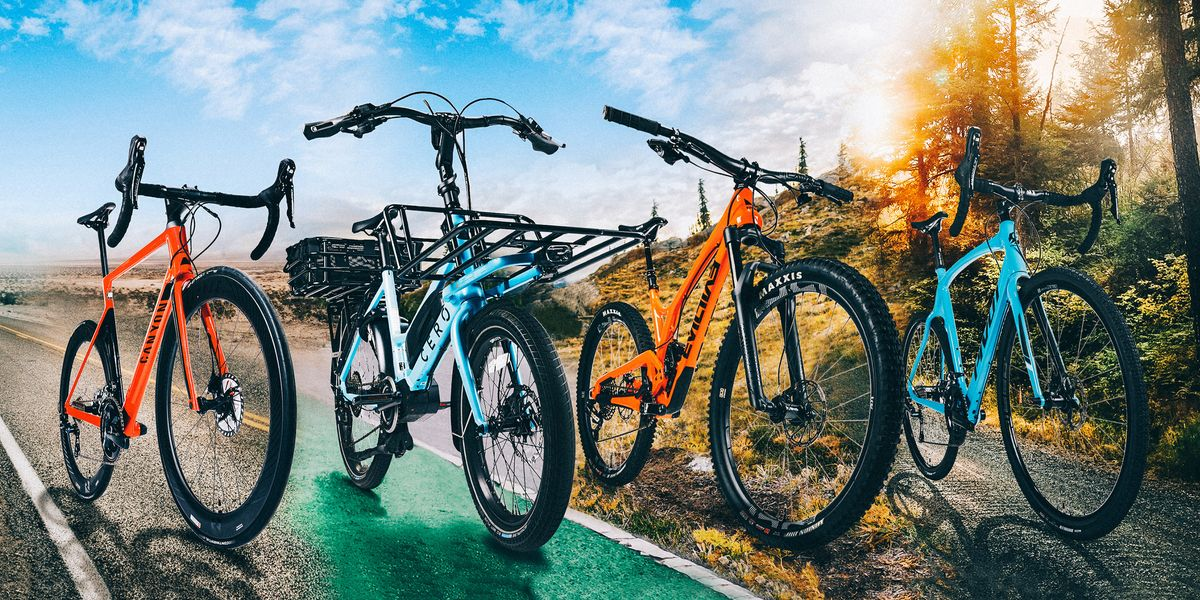




# Bike Sharing Demand

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

<center>
    <img src="bikes.png" alt="" width="525px" height="150px"/>

</center>

# Acknowledgements

Kaggle is hosting this competition for the machine learning community to use for fun and practice. This dataset was provided by Hadi Fanaee Tork using data from Capital Bikeshare. We also thank the UCI machine learning repository for hosting the dataset. If you use the problem in publication, please cite:

Fanaee-T, Hadi, and Gama, Joao, Event labeling combining ensemble detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from matplotlib import pyplot as plt
from plotly import express as px
import datetime as dt
import os

sns.set(rc={'figure.figsize':[10,10]}, font_scale=1.2)
sns.set(style='whitegrid',)

In [2]:
df = pd.read_csv("bike_sharing_daily.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


# ***DATA ANALYSIS***



1.   Each registed user rent bike for 5 ucd/day AND the casual user rent bike for 20 ucd/day
2.   Distribution for rental_bike_count & profit
3.   Which season that has more registration & Profit
4.   Find the correlation Between profit & rental_bike
5.   Calculate the affected on profit at school bet (Sep -- Dec) And (Feb -- jun)
6.   Calculate the affected on profit at 2011 or 2012
7.   profit 2011 & saturday & season 3


In [5]:
df['rental_bike_count'] = df['casual'] + df['registered']

In [6]:
df = df.drop(columns='rental_bike_count')

###**change some of coulmns name**

In [7]:
df.rename(columns = {'yr':'year','cnt':'total_rental'},inplace=True)

In [8]:
df.rename(columns = {'mnth':'mounth'},inplace=True)

In [9]:
df.head()

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**1**.   **Each registed user rent bike for 5 ucd/day AND the casual user rent bike for 20 ucd/day**


In [10]:
def calculate_profit(x):
  price_for_casual_customer=20
  price_for_registed_customer=5
  texas = .14
  casual_customer= x['casual']
  registed_customer=x['registered']
  total_profit= (casual_customer*price_for_casual_customer + registed_customer*price_for_registed_customer) - texas * (casual_customer*price_for_casual_customer + registed_customer*price_for_registed_customer)
  return total_profit


df['Profit'] = df[['casual','registered']].apply(calculate_profit, axis=1)

In [11]:
df.head()

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental,Profit
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8505.4
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,5134.2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,7348.7
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8109.8
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,7937.8


### **2.   Distribution for rental_bike_count & profit**


In [12]:
df.describe()[['Profit','total_rental']]

,Profit,total_rental
count,731.000000,731.000000
mean,30310.176471,4504.348837
std,15720.224996,1937.211452
min,120.400000,22.000000
25%,18404.000000,3152.000000
50%,29089.500000,4548.000000
75%,41512.200000,5956.000000
max,79653.200000,8714.000000


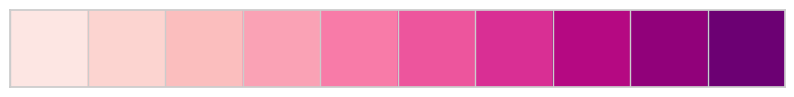

In [13]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

### **1.   Which season that has more registration & Profit**


In [15]:
df.head()

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental,Profit
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8505.4
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,5134.2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,7348.7
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8109.8
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,7937.8


In [16]:
df['dteday']= pd.to_datetime(df['dteday'], format= '%Y-%m-%d', errors='coerce')

In [17]:
df['Year']=df['dteday'].dt.year
df['Mounth_Name']=df["dteday"].dt.month_name()
df["Day_Name"]=df["dteday"].dt.day_name()

In [18]:
df.head()

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rental,Profit,Year,Mounth_Name,Day_Name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8505.4,2011,January,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,5134.2,2011,January,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,7348.7,2011,January,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8109.8,2011,January,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,7937.8,2011,January,Wednesday


# **GROUPING METHOD**

**which most day effect to profit ?**

In [19]:
df.groupby('Day_Name').describe()[['total_rental','Profit']].transpose()

Day_Name                  Friday        Monday      Saturday        Sunday  \
total_rental count    104.000000    105.000000    105.000000    105.000000   
             mean    4690.288462   4338.123810   4550.542857   4228.828571   
             std     1874.624870   1793.074013   2196.693009   1872.496629   
             min     1167.000000     22.000000    627.000000    605.000000   
             25%     3390.750000   3310.000000   2732.000000   2918.000000   
             50%     4601.500000   4359.000000   4521.000000   4334.000000   
             75%     5900.500000   5875.000000   6140.000000   5464.000000   
             max     8362.000000   7525.000000   8714.000000   8227.000000   
Profit       count    104.000000    105.000000    105.000000    105.000000   
             mean   29872.761538  27350.252381  38469.151429  35447.971429   
             std    13703.565619  12898.748117  21101.822433  18095.739148   
             min     5508.300000    120.400000   3431.400000   4072.100000   
             25%    19891.800000  17208.600000  20192.800000  21143.100000   
             50%    29805.450000  27489.900000  37895.900000  35831.900000   
             75%    39318.125000  37603.500000  56072.000000  50967.900000   
             max    67806.700000  65523.400000  79653.200000  70692.000000   

Day_Name                Thursday       Tuesday     Wednesday  
total_rental count    104.000000    104.000000    104.000000  
             mean    4667.259615   4510.663462   4548.538462  
             std     1939.433317   1826.911642   2038.095884  
             min      431.000000    683.000000    441.000000  
             25%     3270.750000   3579.250000   2653.250000  
             50%     4721.000000   4576.500000   4642.500000  
             75%     6286.000000   5769.000000   6175.750000  
             max     7804.000000   7767.000000   8173.000000  
Profit       count    104.000000    104.000000    104.000000  
             mean   27692.620192  26570.609615  26668.475962  
             std    12615.533052  11821.204319  13350.245886  
             min     2046.800000   3053.000000   2012.400000  
             25%    18029.900000  18183.625000  13666.475000  
             50%    27582.350000  27741.450000  26902.950000  
             75%    39254.700000  35038.550000  35101.975000  
             max    50972.200000  47760.100000  64882.700000

The most profit goes on  # **saturday** 

**which most season affect to profit ?**

In [20]:
df.groupby('season').describe()[['total_rental','Profit']].transpose()

season                         1             2             3             4
total_rental count    181.000000    184.000000    188.000000    178.000000
             mean    2604.132597   4992.331522   5644.303191   4728.162921
             std     1399.942119   1695.977235   1459.800381   1699.615261
             min      431.000000    795.000000   1115.000000     22.000000
             25%     1538.000000   4003.000000   4586.500000   3615.500000
             50%     2209.000000   4941.500000   5353.500000   4634.500000
             75%     3456.000000   6377.000000   6929.250000   5624.500000
             max     7836.000000   8362.000000   8714.000000   8555.000000
Profit       count    181.000000    184.000000    188.000000    178.000000
             mean   15518.343646  35735.687500  39784.194681  29736.650000
             std     9918.685514  15226.470081  11916.625191  13395.061231
             min     2012.400000   4979.400000   7709.900000    120.400000
             25%     8109.800000  26552.500000  30175.250000  20458.325000
             50%    13248.300000  33150.850000  40757.550000  27520.000000
             75%    19745.600000  43723.475000  47020.500000  36968.175000
             max    74394.300000  79653.200000  78234.200000  73349.400000

The most profit goes on  # **3** 

# ***Find the correlation Between profit & rental_bike***

In [21]:
df.corr()[['Profit','total_rental']].loc[['casual','registered']]

,Profit,total_rental
casual,0.919955,0.672804
registered,0.723740,0.945517


<AxesSubplot:>

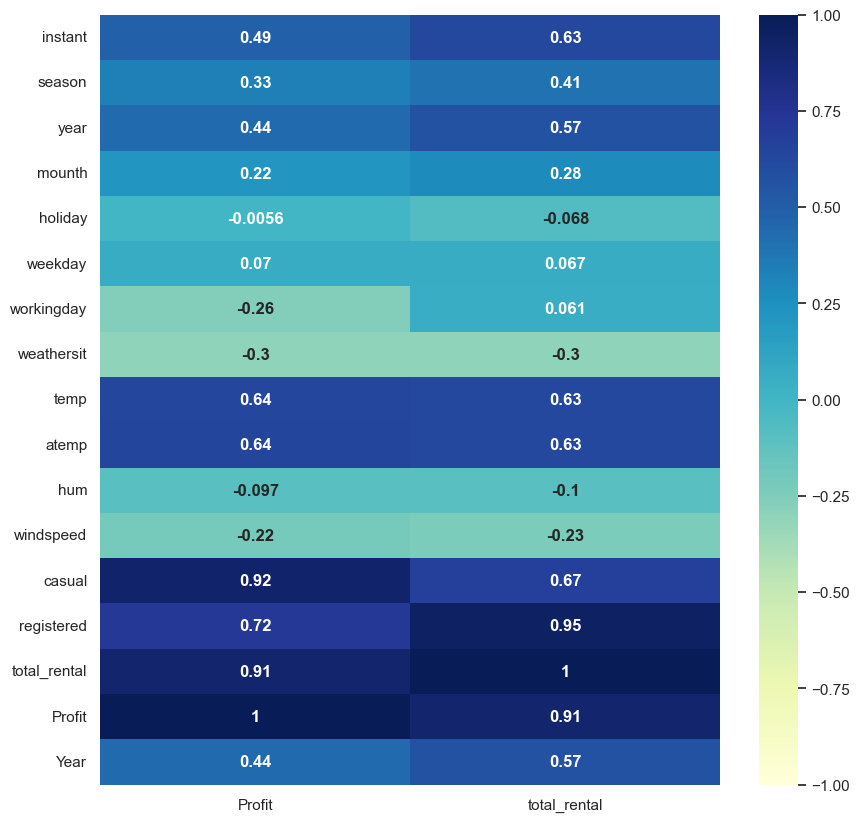

In [22]:
sns.heatmap(df.corr()[['Profit','total_rental']], cmap="YlGnBu", annot=True, vmin=-1, vmax=1,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# **Calculate the affected on profit at school bet (Sep -- Dec) And (Feb -- jun)**

In [23]:
df['Mounth_Name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [24]:
def calculate_schools_months(month):
  if month in ['September','October','November','December','February','March','April','May','June']:
    return 1
  else:
    return 0  
df["School_Months"] = df['Mounth_Name'].apply(calculate_schools_months)

In [25]:
df.groupby('Mounth_Name').describe()[['total_rental','Profit']].transpose()

Mounth_Name                April        August      December      February  \
total_rental count     60.000000     62.000000     62.000000     57.000000   
             mean    4484.900000   5664.419355   3403.806452   2655.298246   
             std     1776.160778   1494.516146   1549.639353   1145.313307   
             min      795.000000   1115.000000    441.000000   1005.000000   
             25%     3188.250000   4582.500000   2425.000000   1623.000000   
             50%     4293.500000   5229.500000   3444.000000   2402.000000   
             75%     6205.250000   7121.000000   4633.000000   3777.000000   
             max     7460.000000   7865.000000   6606.000000   5062.000000   
Profit       count     60.000000     62.000000     62.000000     57.000000   
             mean   32357.500000  39345.762903  19149.911290  14804.145614   
             std    15597.685737  10706.003486   8339.319381   6553.473940   
             min     4979.400000   7709.900000   2012.400000   5611.500000   
             25%    21852.600000  31176.075000  13007.500000   8909.600000   
             50%    30994.400000  39966.350000  18404.000000  13936.300000   
             75%    41374.600000  47037.700000  25689.275000  19401.600000   
             max    71435.900000  70287.800000  38876.300000  37078.900000   

Mounth_Name              January          July          June         March  \
total_rental count     62.000000     62.000000     60.000000     62.000000   
             mean    2176.338710   5563.677419   5772.366667   3692.258065   
             std     1161.674370   1273.751871   1240.400031   1899.301812   
             min      431.000000   3285.000000   3767.000000    605.000000   
             25%     1251.750000   4491.500000   4834.500000   2077.000000   
             50%     1939.000000   5446.500000   5308.500000   3216.500000   
             75%     3235.750000   6678.750000   6983.000000   5361.000000   
             max     4521.000000   8173.000000   8120.000000   8362.000000   
Profit       count     62.000000     62.000000     60.000000     62.000000   
             mean   11863.769355  40185.511290  40710.966667  25123.929032   
             std     6849.450085  10991.816450  12438.187666  15041.828052   
             min     2046.800000  21813.900000  23228.600000   3272.300000   
             25%     6523.100000  29824.800000  30737.475000  13278.400000   
             50%     9952.350000  40306.050000  39781.450000  23632.800000   
             75%    15911.075000  45778.875000  45684.275000  33704.475000   
             max    33243.300000  65523.400000  71341.300000  74394.300000   

Mounth_Name                  May      November       October     September  
total_rental count     62.000000     60.000000     62.000000     60.000000  
             mean    5349.774194   4247.183333   5199.225806   5766.516667  
             std     1298.711561   1285.712709   1988.392517   1810.130649  
             min     2633.000000   1495.000000     22.000000   1842.000000  
             25%     4409.000000   3386.000000   3967.250000   4532.000000  
             50%     4890.500000   4081.000000   5013.000000   5384.000000  
             75%     6405.500000   5317.000000   7238.750000   7509.250000  
             max     8294.000000   6852.000000   8156.000000   8714.000000  
Profit       count     62.000000     60.000000     62.000000     60.000000  
             mean   38668.166129  26132.533333  34790.606452  39915.466667  
             std    13598.393286   9431.981265  15640.946937  15179.939122  
             min    14611.400000   7800.200000    120.400000   9894.300000  
             25%    29105.625000  20932.400000  24377.775000  29105.625000  
             50%    35588.950000  26077.350000  34253.800000  42099.150000  
             75%    46140.075000  30532.150000  44002.975000  47165.625000  
             max    79653.200000  59004.600000  73349.400000  78234.200000

In [26]:
df.groupby('School_Months').describe()['total_rental']

,count,mean,std,min,25%,50%,75%,max
School_Months,,,,,,,,
0,186.0,4468.145161,2087.701116,431.0,3221.25,4545.0,6277.75,8173.0
1,545.0,4516.704587,1884.966964,22.0,3129.00,4548.0,5847.00,8714.0


In [27]:
df.groupby('School_Months').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
School_Months,,,,,,,,
0,186.0,30465.014516,16344.932642,2046.8,15887.425,30852.5,43790.125,70287.8
1,545.0,30257.332661,15516.334046,120.4,18623.300,28423.0,41065.000,79653.2


# **Calculate the affected on profit at 2011 or 2012**

In [28]:
def calculate_number_year(year):
   if year==0:
     return 2011
   else:
     return 2012
df["year_number"] = df['year'].apply(calculate_number_year)

In [29]:
df.head()

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,total_rental,Profit,Year,Mounth_Name,Day_Name,School_Months,year_number
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,8505.4,2011,January,Saturday,0,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.248539,131,670,801,5134.2,2011,January,Sunday,0,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.248309,120,1229,1349,7348.7,2011,January,Monday,0,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.160296,108,1454,1562,8109.8,2011,January,Tuesday,0,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.186900,82,1518,1600,7937.8,2011,January,Wednesday,0,2011


In [30]:
df['year_number'].unique()

array([2011, 2012], dtype=int64)

In [31]:
df.groupby('year_number').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
year_number,,,,,,,,
2011,365.0,23383.270411,12120.790419,2046.8,13248.30,23830.6,30353.70,65523.4
2012,366.0,37218.156557,15871.576283,120.4,25617.25,38528.0,46493.75,79653.2


# **profit 2011 & saturday & season 3**


In [32]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'mounth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total_rental', 'Profit', 'Year', 'Mounth_Name',
       'Day_Name', 'School_Months', 'year_number'],
      dtype='object')

In [33]:
df['Day_Name'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [34]:
data_ch1= df[ (df['year_number']==2011) & (df['season']==3) & (df['Day_Name']=='Saturday') ]

In [35]:
data_ch1.head(3)

,instant,dteday,season,year,mounth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,total_rental,Profit,Year,Mounth_Name,Day_Name,School_Months,year_number
175,176,2011-06-25,3,0,6,0,6,0,1,0.695000,...,0.209571,1782,3420,5202,45356.4,2011,June,Saturday,1,2011
182,183,2011-07-02,3,0,7,0,6,0,1,0.738333,...,0.115062,2204,2915,5119,50443.3,2011,July,Saturday,0,2011
189,190,2011-07-09,3,0,7,0,6,0,1,0.733333,...,0.167912,1988,3348,5336,48590.0,2011,July,Saturday,0,2011


In [36]:
#THIS THE PROFIT COMES FROM (2011 IN SEASON 3 AT SATURDAY)
data_ch1['Profit'].sum()

525012.8

# **DATA VISULIZATION**

**NUMERICAL VARIABLES**

- temp
- atemp
- hum
- windspeed
- casual
- registered
- total_rental
- Profit


## **VARIANT VARIABLE**

C:\Users\Mina\AppData\Local\Temp\ipykernel_38684\2194566775.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['temp'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='black', col_wrap=None, height=5, aspect=1)


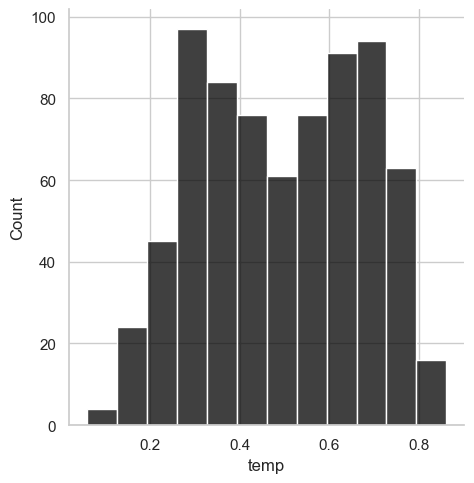

In [38]:
sns.displot(df['temp'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='black', col_wrap=None, height=5, aspect=1)

In [40]:
df['temp'].value_counts()

0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: temp, Length: 499, dtype: int64

In [41]:
df['temp'].max()

0.861667

**weatheris stable**

C:\Users\Mina\AppData\Local\Temp\ipykernel_38684\1511039348.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['hum'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='m', col_wrap=None, height=5, aspect=1,bins=15)


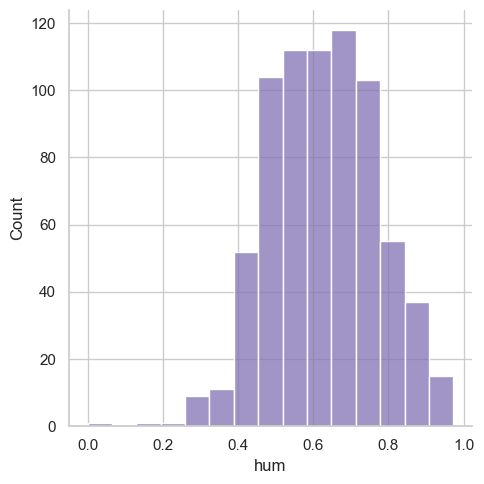

In [44]:
sns.displot(df['hum'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='m', col_wrap=None, height=5, aspect=1,bins=15)

C:\Users\Mina\AppData\Local\Temp\ipykernel_38684\2769857018.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['windspeed'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='b', col_wrap=None, height=5, aspect=1)


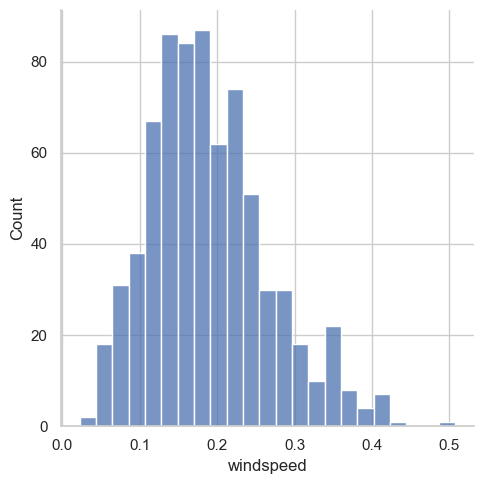

In [46]:
sns.displot(df['windspeed'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='b', col_wrap=None, height=5, aspect=1)

C:\Users\Mina\AppData\Local\Temp\ipykernel_38684\2286451314.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['casual'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='k', col_wrap=None, height=5, aspect=1)


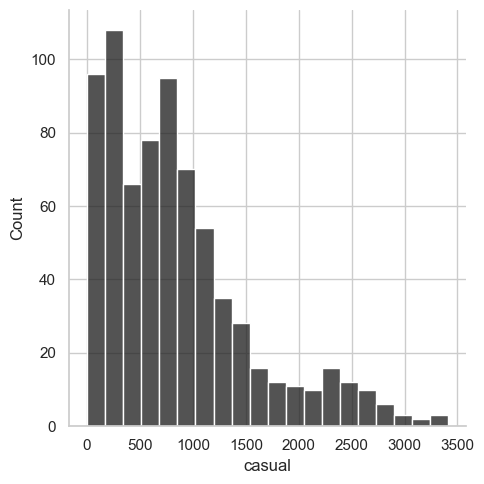

In [47]:
sns.displot(df['casual'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='k', col_wrap=None, height=5, aspect=1)

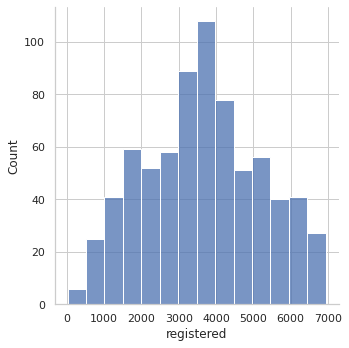

In [ ]:
sns.displot(df['registered'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='B', col_wrap=None, height=5, aspect=1)

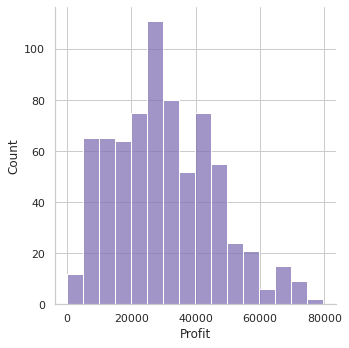

In [ ]:
sns.displot(df['Profit'] , kde=False,kind="hist",palette='mako', hue_order=None, hue_norm=None, color='M', col_wrap=None, height=5, aspect=1)

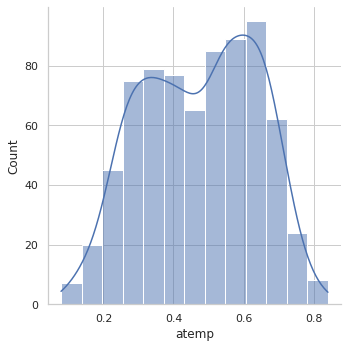

In [ ]:
sns.displot(data=df, x="atemp", kde=True)

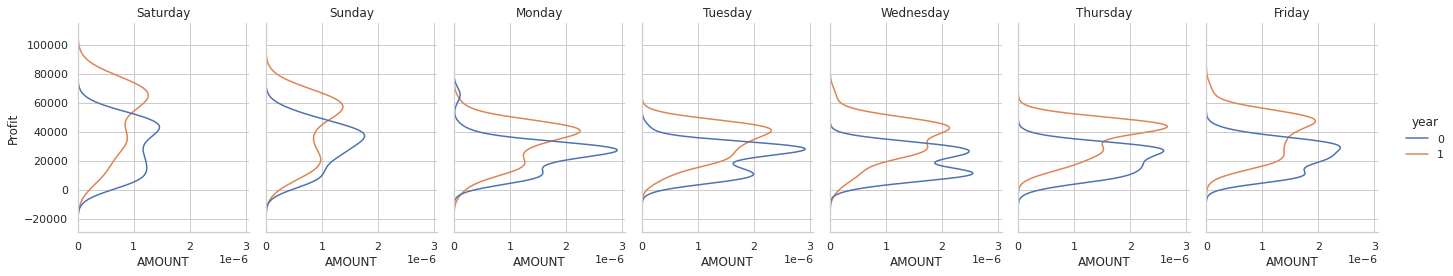

In [ ]:
g = sns.displot(
    data=df, y="Profit", hue="year", col="Day_Name",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("AMOUNT", "Profit")
g.set_titles("{col_name}")

**MULTIBLE / BI-VARIANT VARIABLE**

1.   temp
2.   atemp
3.   hum
4.   windspeed
5.   casual
6.   registered
7.   total_rental
8.   Profit

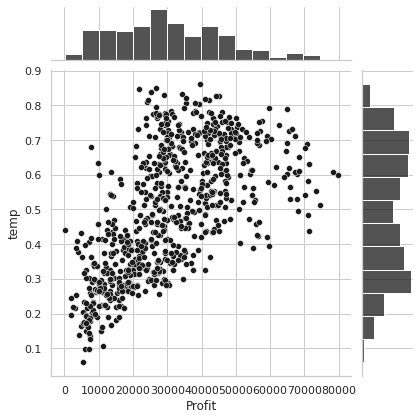

In [ ]:
sns.jointplot(x='Profit',y='temp',data=df,color='k')

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'mounth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total_rental', 'Profit', 'Year', 'Mounth_Name',
       'Day_Name', 'School_Months', 'year_number'],
      dtype='object')

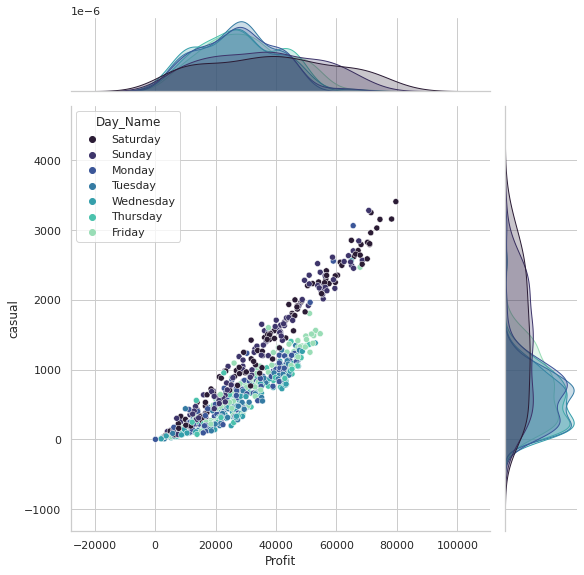

In [ ]:
# palette='mako' 'deep', 'muted', 'pastel', 'bright', 'dark',  'colorblind'
sns.jointplot(x='Profit',y='casual',data=df,color='k', hue="Day_Name",height=8,palette='mako')

**NUMERICAL VARIABLES**

- season
- mounth
- holiday
- weekday
- Mounth_Name
- year_number
- Day_Name
- School_Months


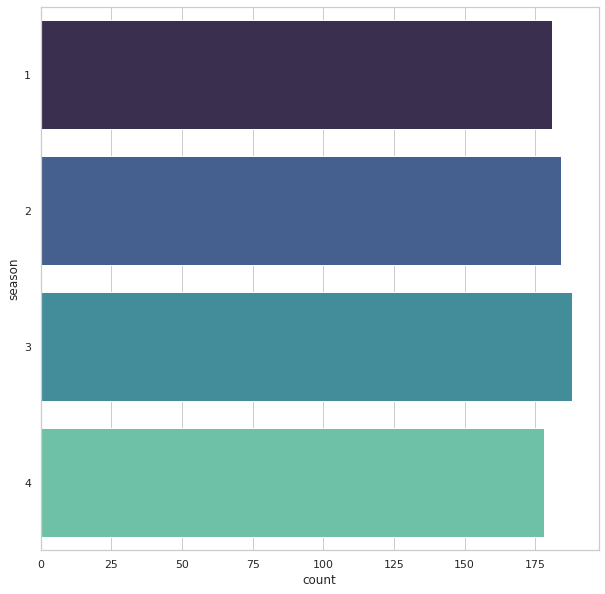

In [ ]:
sns.countplot(y='season',data=df,palette='mako')

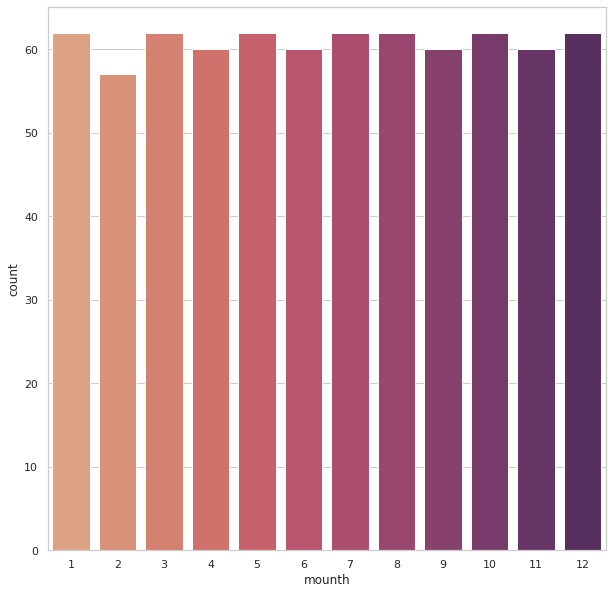

In [ ]:
sns.countplot(x='mounth',data=df,palette='flare') 

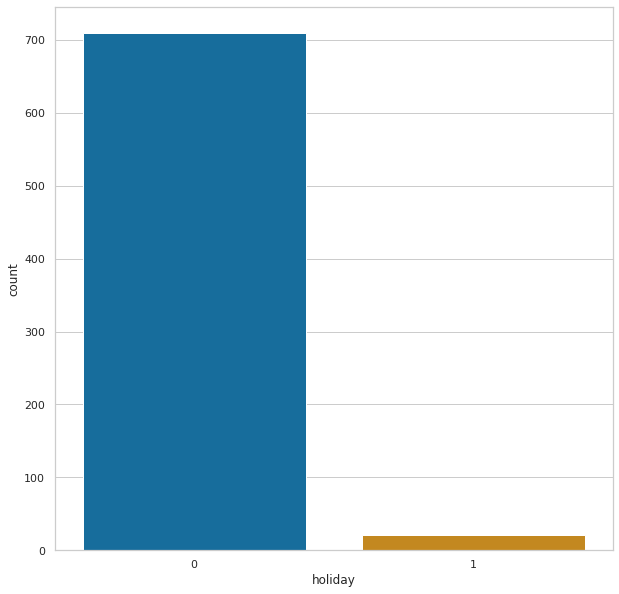

In [ ]:
sns.countplot(x='holiday',data=df,palette='colorblind')

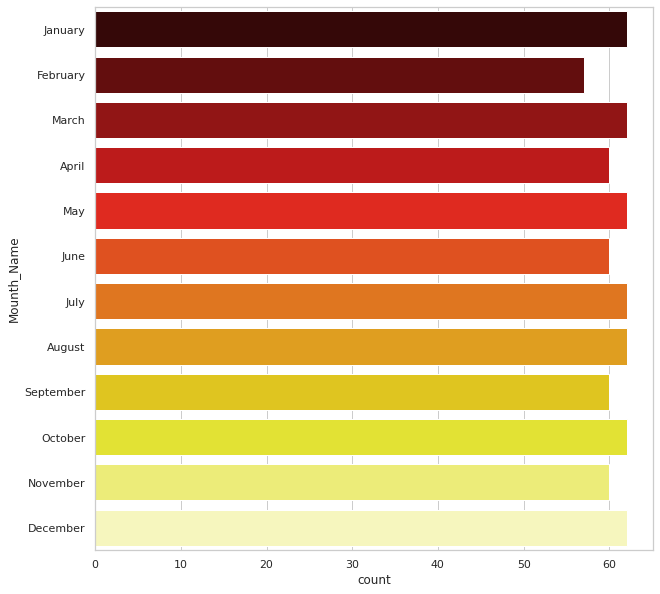

In [ ]:
sns.countplot(y='Mounth_Name',data=df,palette='hot')

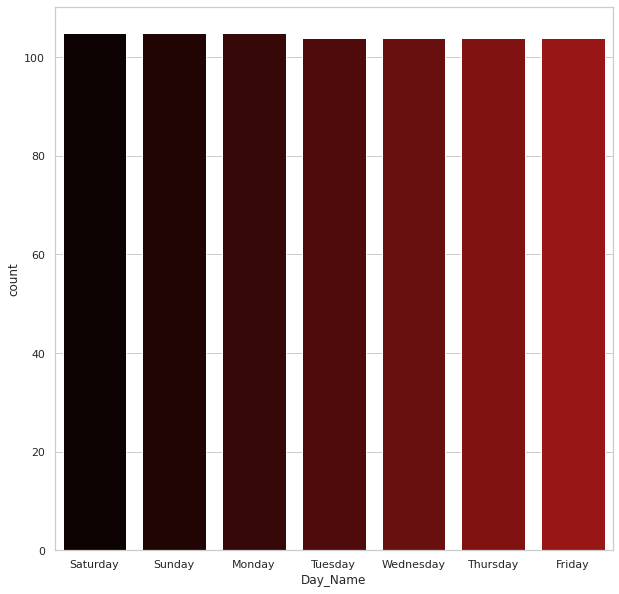

In [ ]:
sns.countplot(x='Day_Name',data=df,palette='flag_r')

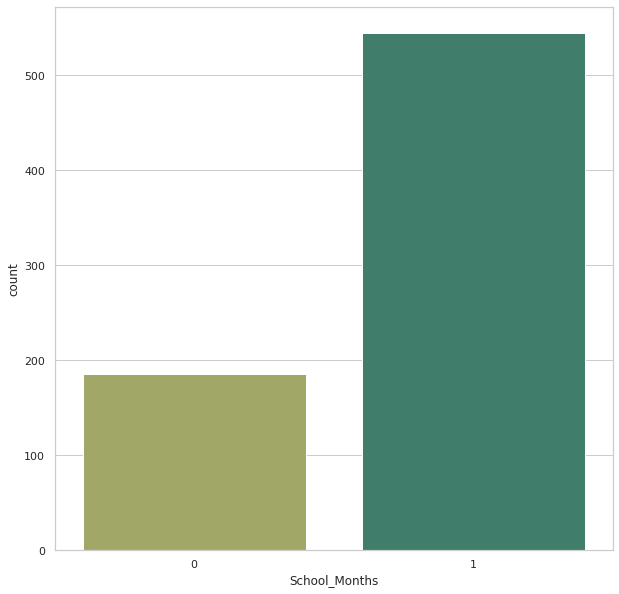

In [ ]:
sns.countplot(x='School_Months',data=df,palette='gist_earth_r')

season
mounth
holiday
weekday
Mounth_Name
year_number
Day_Name
School_Months

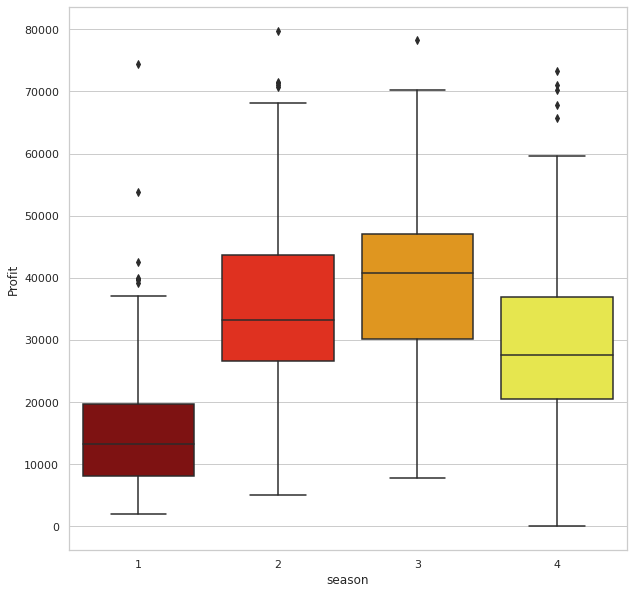

In [ ]:
sns.boxplot(x='season',y='Profit',data=df,palette='hot')

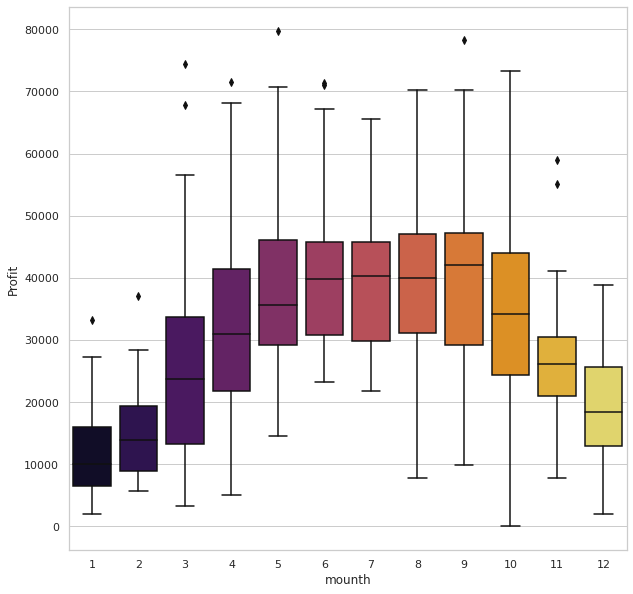

In [ ]:
sns.boxplot(y='Profit',x='mounth',data=df,palette='inferno')

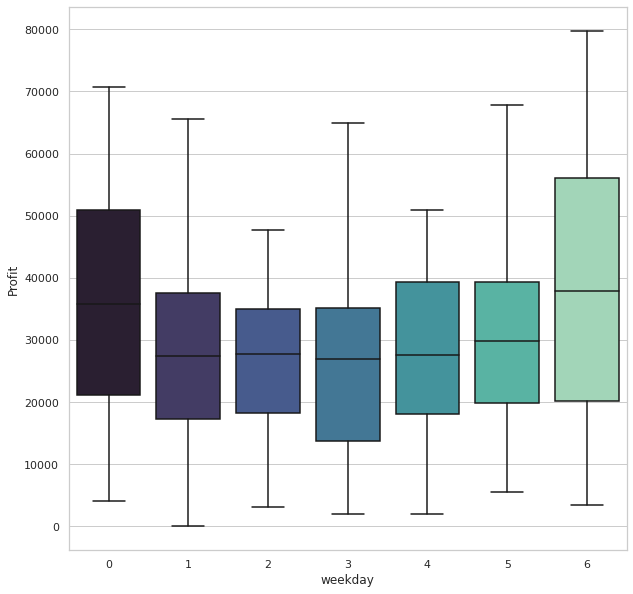

In [ ]:
sns.boxplot(x='weekday',y='Profit',data=df,palette='mako')

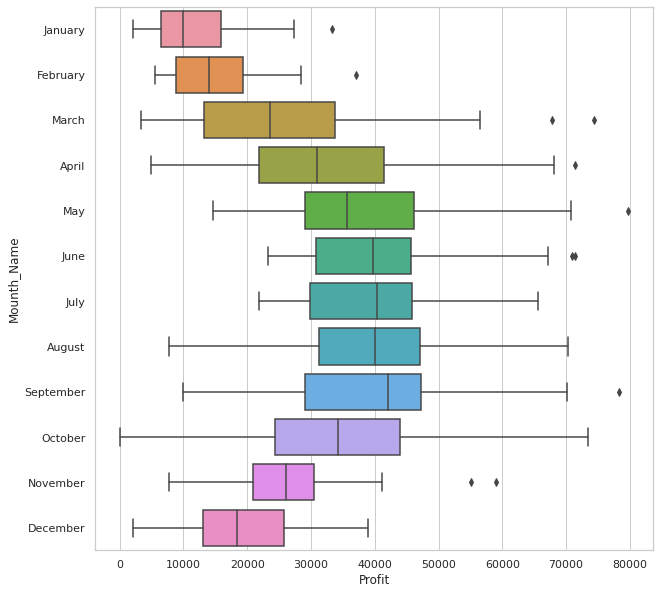

In [ ]:
sns.boxplot(y='Mounth_Name',x='Profit',data=df)

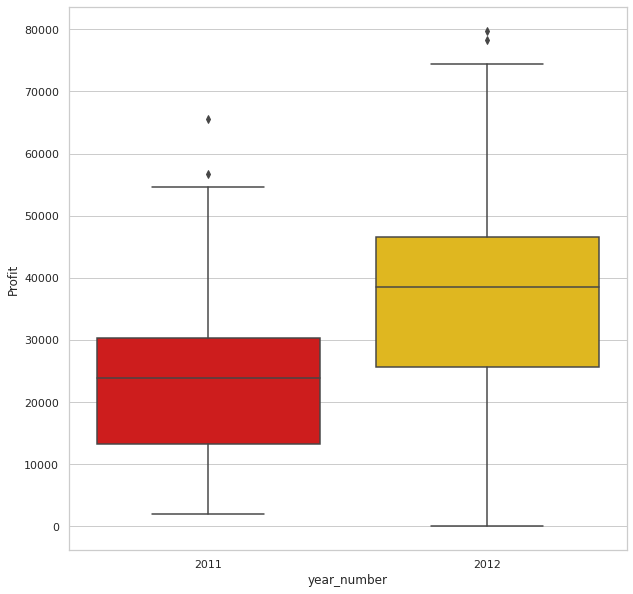

In [ ]:
sns.boxplot(x='year_number',y='Profit',data=df,palette='hot')

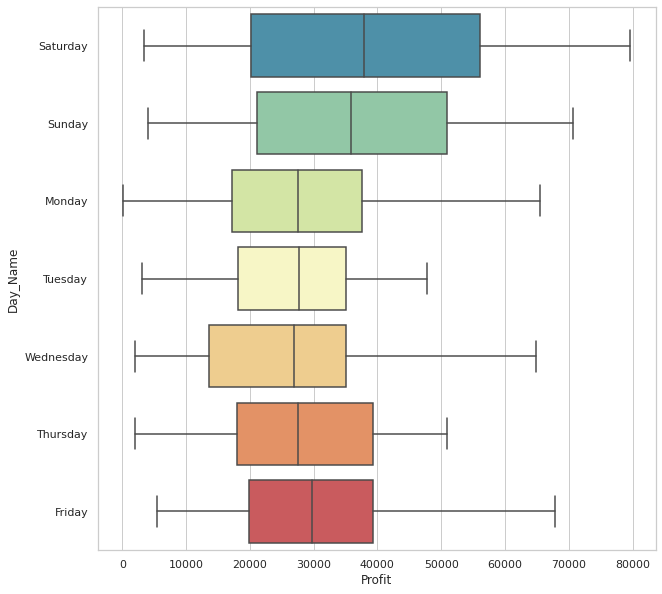

In [ ]:
sns.boxplot(y='Day_Name',x='Profit',data=df,palette='Spectral_r')

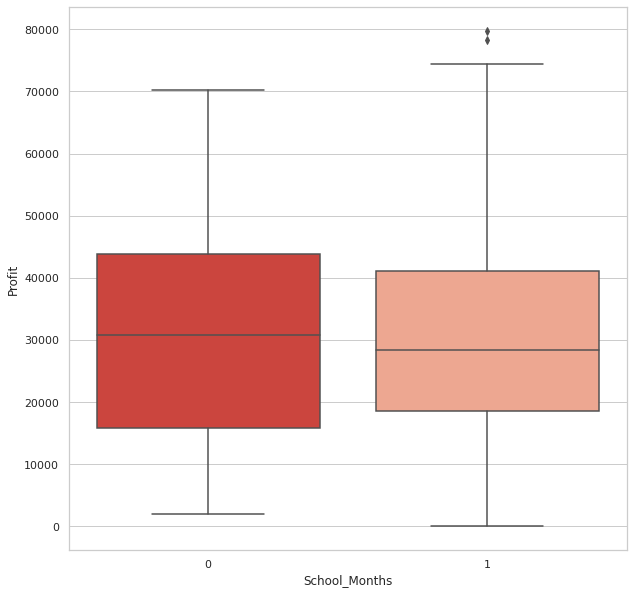

In [ ]:
sns.boxplot(x='School_Months',y='Profit',data=df,palette='Reds_r')

# **HEATMAP BLOT**

In [ ]:
df_ch= pd.pivot_table(data=df, values='registered', columns='Day_Name', index='Mounth_Name')

In [ ]:
df_ch

Day_Name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Mounth_Name,,,,,,,
April,3543.777778,3715.555556,2775.333333,2652.555556,4065.250000,3907.750000,3790.375000
August,4817.000000,4588.666667,3422.250000,3218.000000,5067.555556,4940.777778,5130.700000
December,3408.666667,3189.333333,2641.100000,2275.777778,3453.111111,3425.000000,3073.750000
February,2674.625000,2397.000000,1807.500000,1796.500000,2702.250000,2692.625000,2647.222222
January,2299.000000,1802.400000,1614.111111,1511.000000,2387.375000,2401.333333,2015.875000
July,4364.666667,4640.222222,3403.777778,3513.500000,4718.500000,4929.777778,4732.750000
June,4625.000000,4607.125000,4147.666667,3863.625000,4784.666667,4870.125000,4854.777778
March,3242.333333,3040.125000,2585.222222,2210.750000,3324.800000,3120.222222,3187.888889
May,4664.500000,3489.444444,3709.000000,3281.777778,5004.555556,4322.800000,4467.000000


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


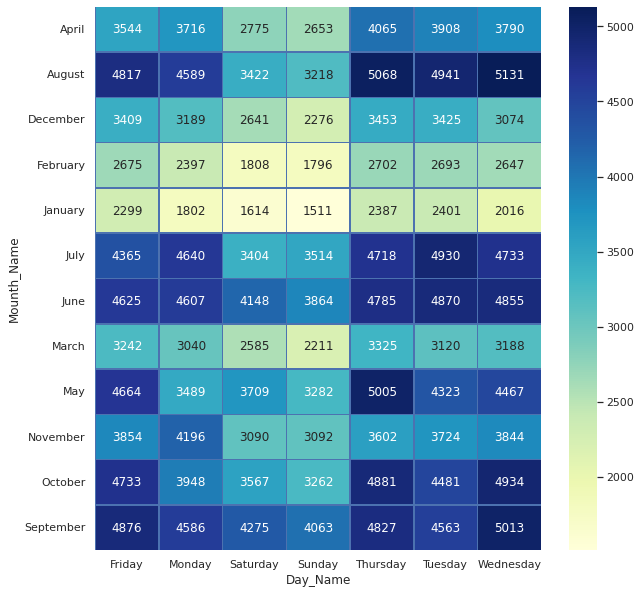

In [ ]:
sns.heatmap(df_ch,annot=True,fmt='0.0f', linewidths=.5,linecolor='B', cbar=True, cmap="YlGnBu")

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'mounth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total_rental', 'Profit', 'Year', 'Mounth_Name',
       'Day_Name', 'School_Months', 'year_number'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   year           731 non-null    int64         
 4   mounth         731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_rental   731 non-

In [ ]:
#pallet_ccolors
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',